In [8]:

from utils.bot.parser import get_parser
from utils.requests import fetch_event_log, fetch_bot_model
from enhancement.main import enhance_bot_model, average_intent_confidence, case_durations
import pm4py

In [9]:
bot_model_json = fetch_bot_model("MensaBot")

Fetching bot model from https://mobsos.tech4comp.dbis.rwth-aachen.de/SBFManager/models/MensaBot


In [10]:
bot_manager_endpoint = "https://mobsos.tech4comp.dbis.rwth-aachen.de/SBFManager"
bot_parser = get_parser(bot_model_json)
event_log = fetch_event_log("MensaBot")
bot_model_dfg, start_activities, end_activities, performance = enhance_bot_model(
event_log, bot_parser)

Fetching event log from https://mobsos.tech4comp.dbis.rwth-aachen.de/event-log/bot/MensaBot


parsing log, completed traces :: 100%|██████████| 22/22 [00:00<00:00, 2907.30it/s]
/Users/lakhoune/Desktop/Repos/mobsos-event-log-generator/.venv/lib/python3.11/site-packages/pm4py/utils.py:495: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")
aligning log, completed variants :: 100%|██████████| 11/11 [00:00<00:00, 388.58it/s]


# Discovered Model

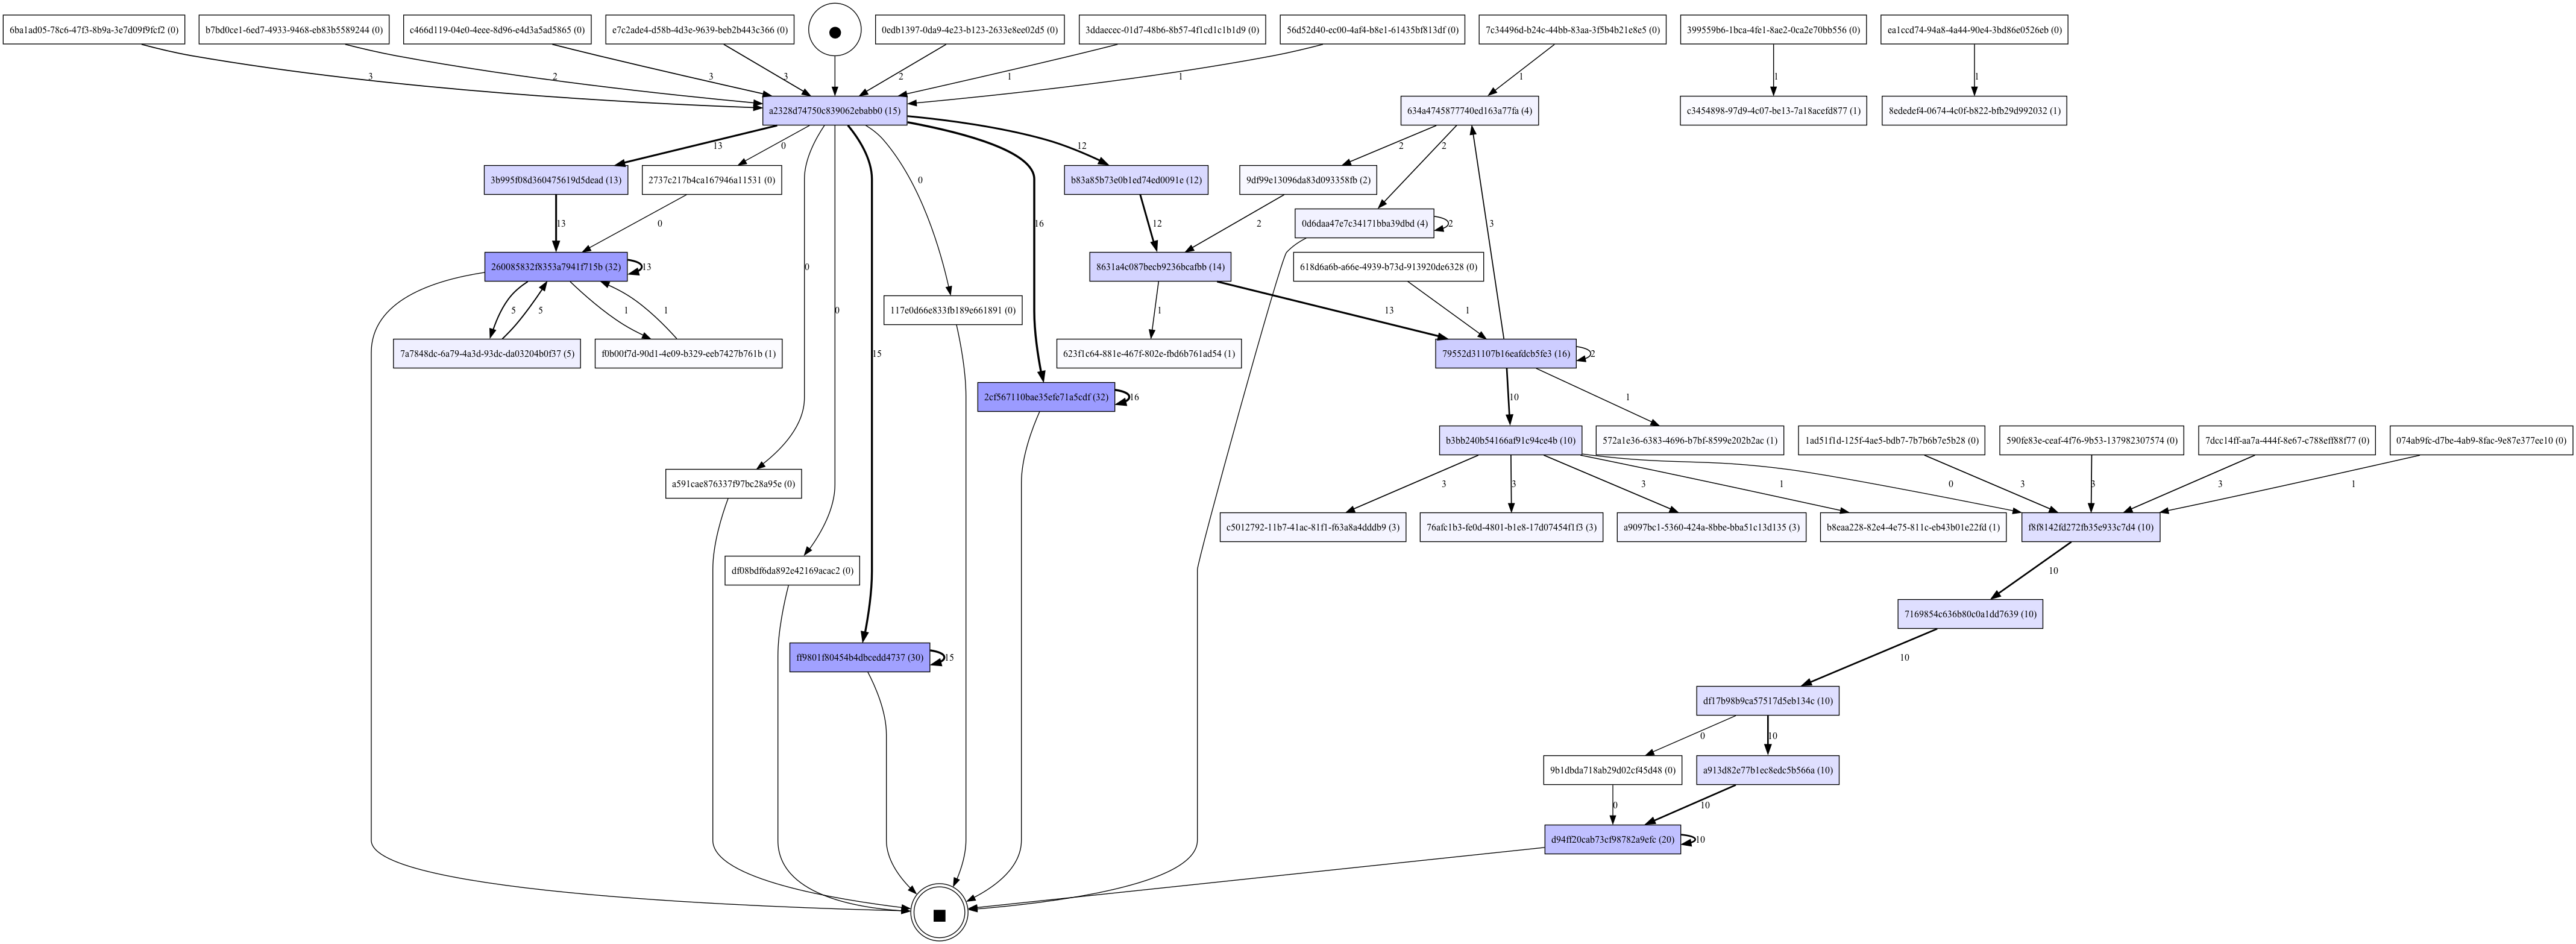

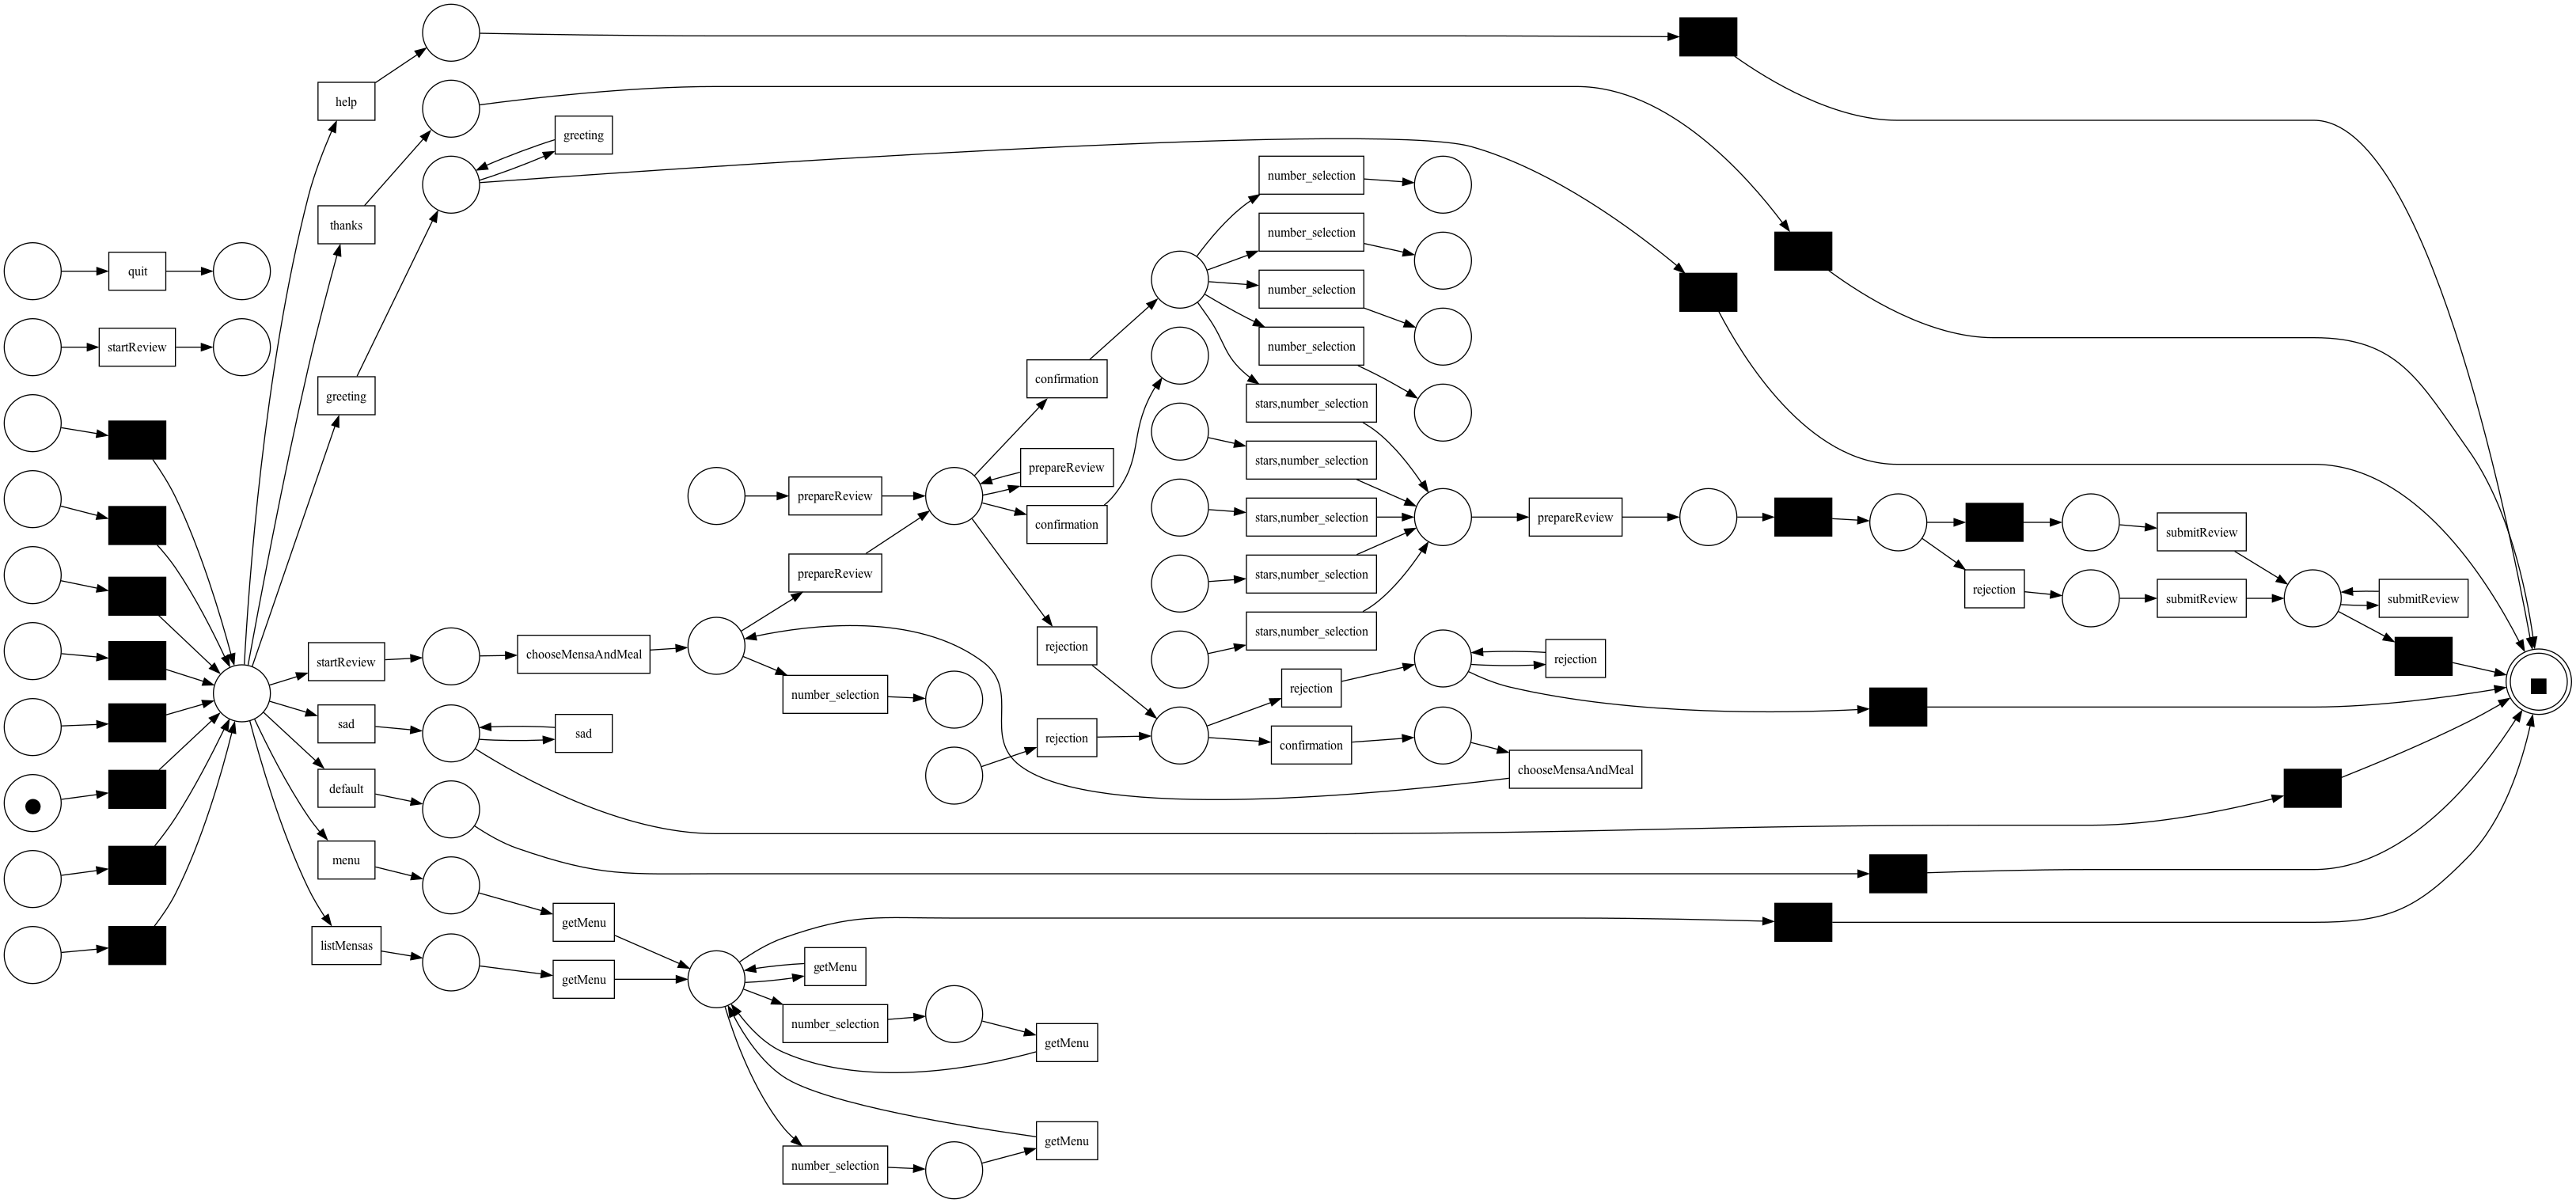

In [13]:
pm4py.view_dfg(bot_model_dfg, start_activities, end_activities)
net,im, fm = bot_parser.to_petri_net(bot_model_dfg,start_activities,end_activities)
pm4py.view_petri_net(net, im, fm)